In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
sns.set()


In [83]:
#Data_Marketing_Customer_Analysis_Round3.csv

weds_file= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df=pd.DataFrame(weds_file)

In [84]:
result = df.dtypes
result


region                           object
customer_lifetime_value           int64
response                         object
coverage                         object
education                        object
effective_to_date                object
month                            object
employment_status                object
gender                           object
income                            int64
location_code                    object
marital_status                   object
monthly_premium_auto              int64
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
total_claim_amount                int64
vehicle_class                    object
vehicle_size                     object
dtype: object

In [85]:
category_list=list(df.select_dtypes(['object']).columns)
category_list



['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [86]:
numlist=list(df.select_dtypes(['int64']).columns)

In [283]:
numeric_df = df[[
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']]


In [88]:
lst=len(numeric_df.columns)
lst

8

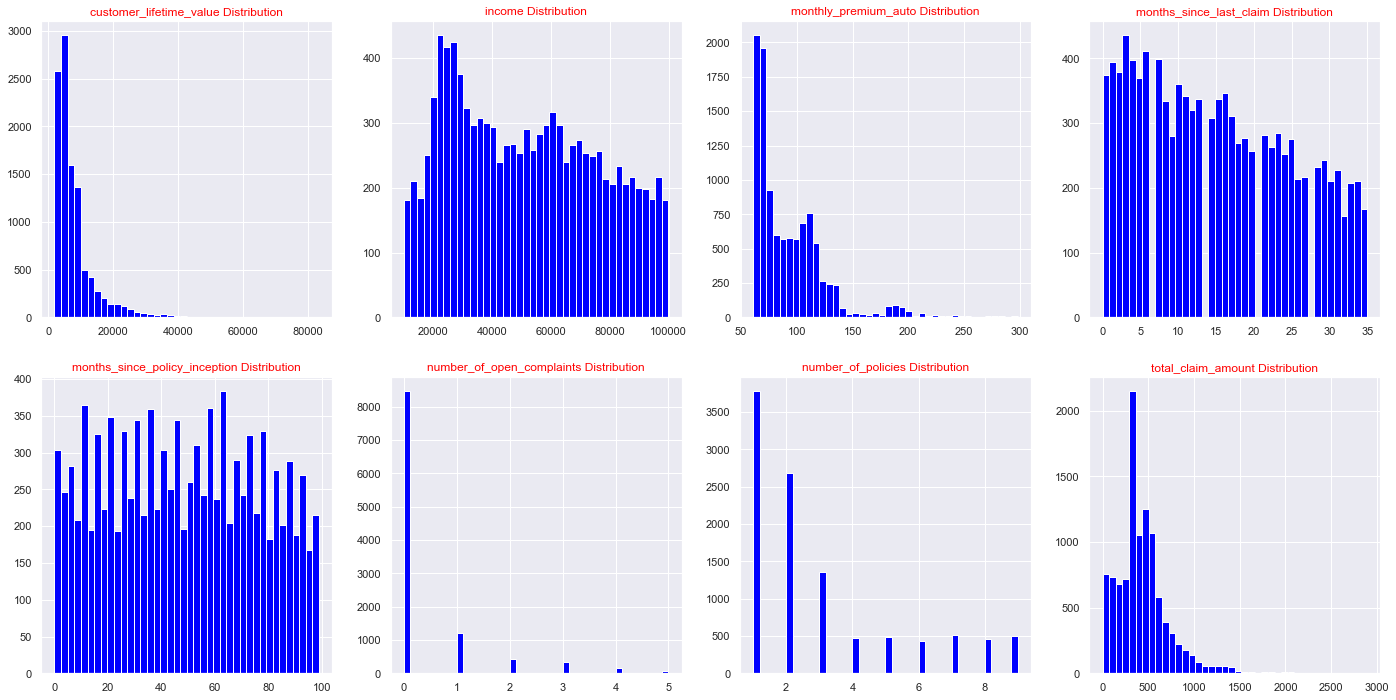

In [89]:
def histograms_plot(dataframe, features, rows, cols):

    
 fig = plt.figure(figsize=(24,12))

 for i, feature in enumerate(features):
        
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=40,ax=ax,facecolor='blue')
        ax.set_title(feature+" Distribution",color='red')
        
#fig.tight_layout()  

plt.show()

histograms_plot(numeric_df,numeric_df.columns,2,4)





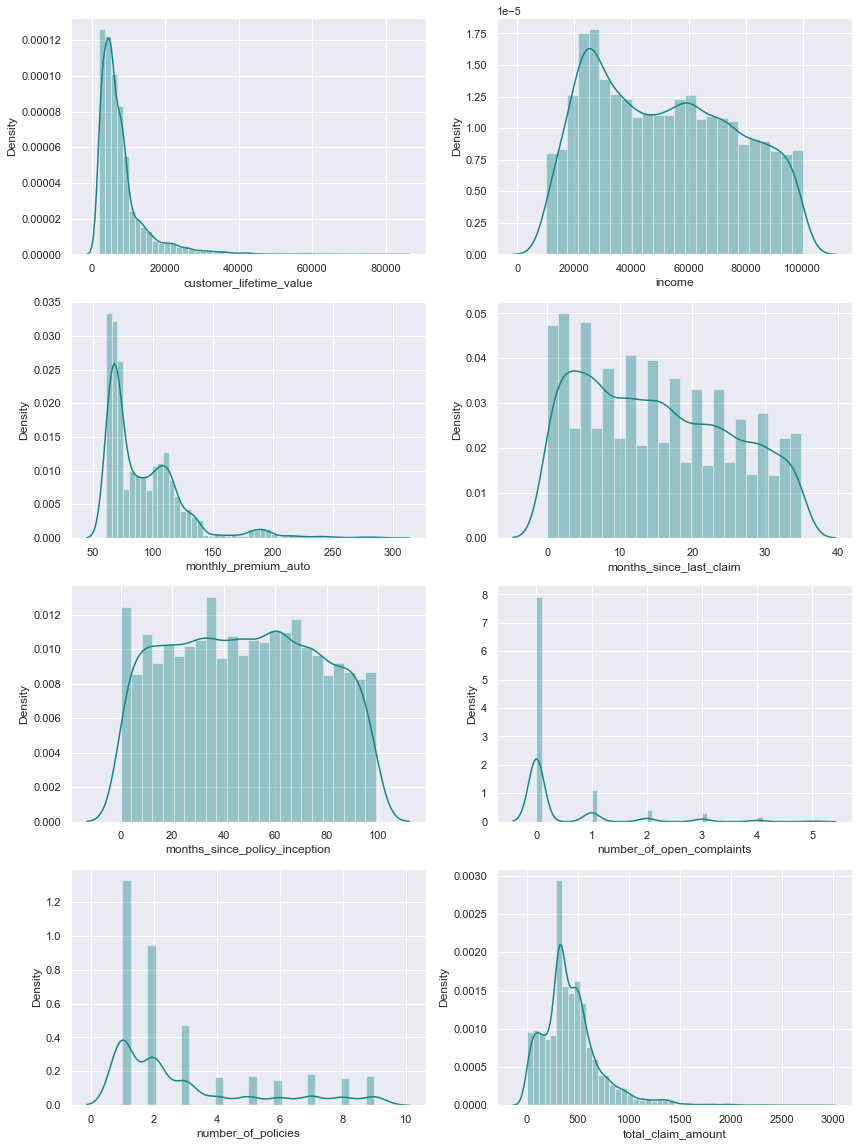

In [90]:

plt.subplots(figsize=(14, 20))

count=1
for i in numeric_df.columns:
    plt.subplot(4,2,count)
    sns.distplot(numeric_df[i],color='#158685')
    count+=1
        
plt.show()

 - Do the distributions for different numerical variables look like a normal distribution?
 
A normal distribution is an arrangement of a data set in which most values cluster in the middle of the range and the rest taper off symmetrically toward either extreme.

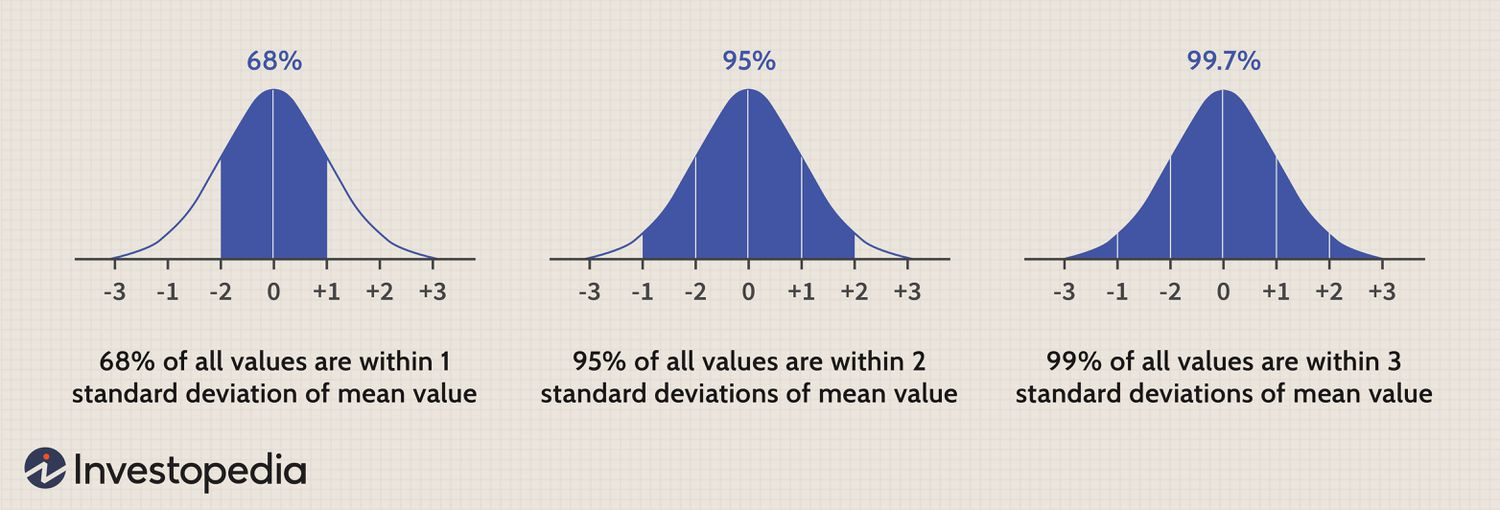]


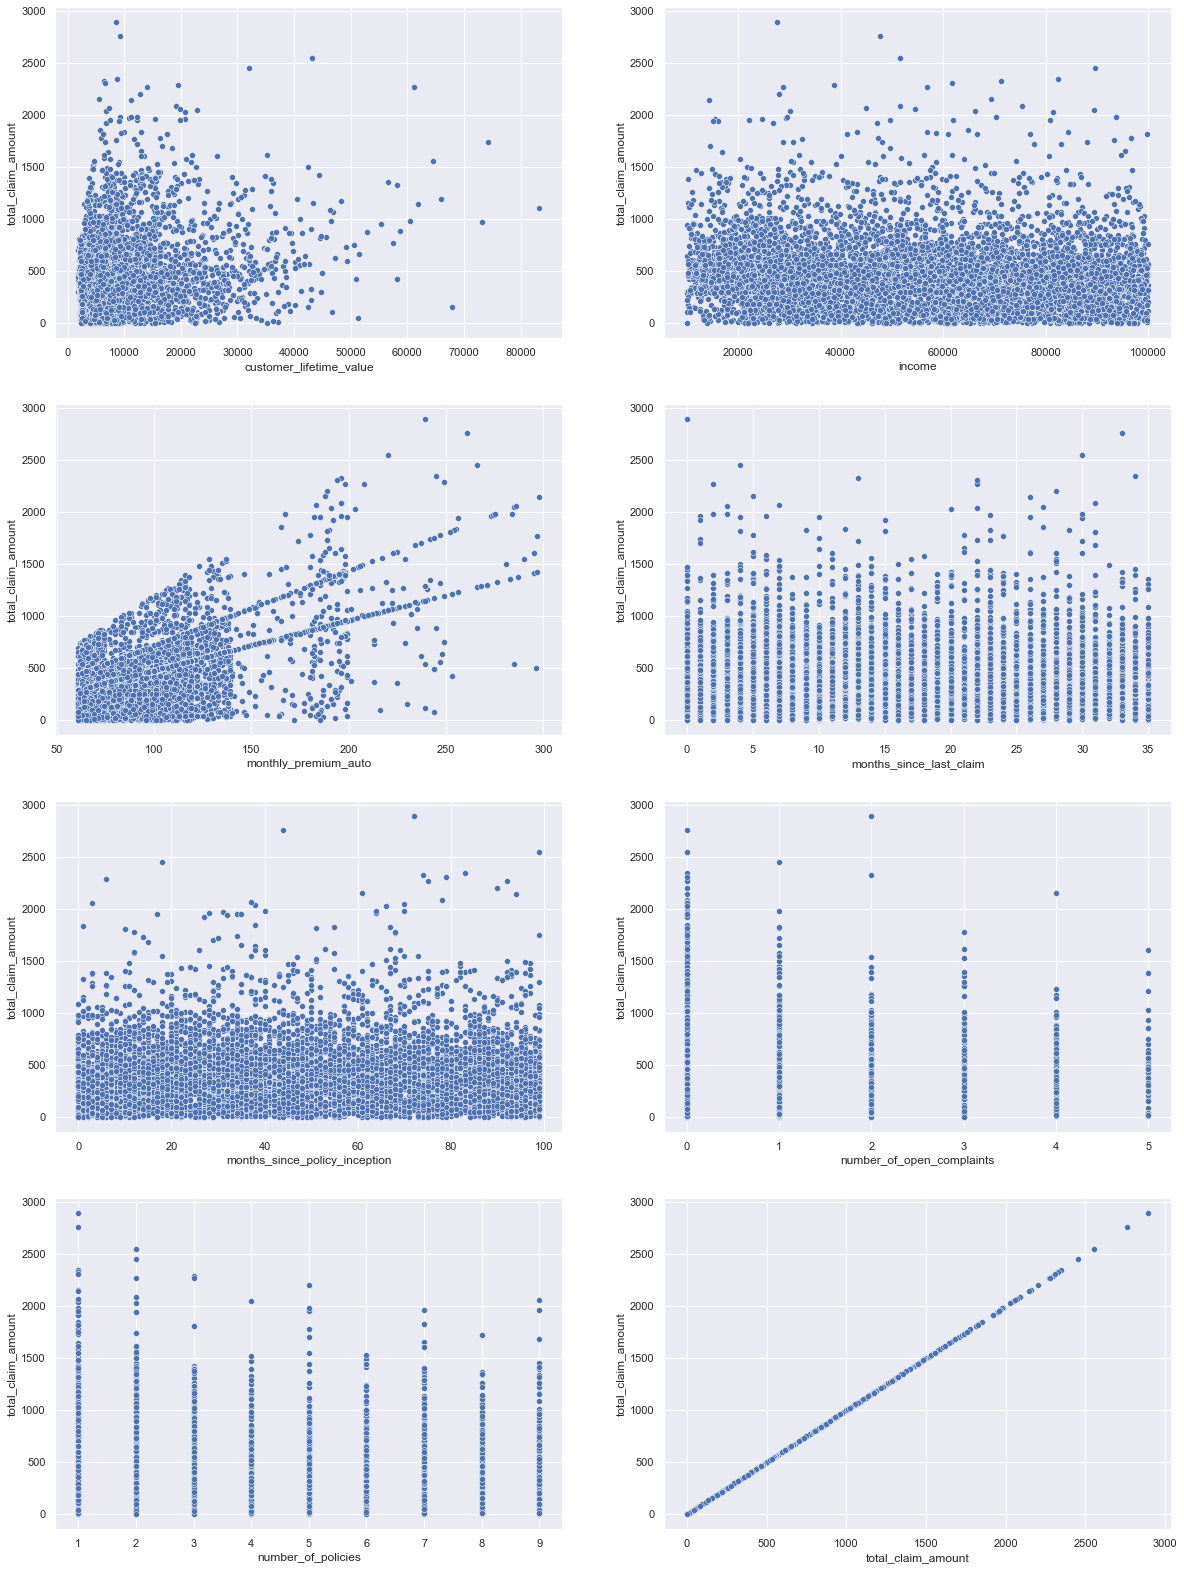

In [91]:
#scatter plot checking numerical variables with our target variable total claim amount
count=1
plt.subplots(figsize=(20, 28))

for i in numeric_df.columns:
    plt.subplot(4,2,count)
    sns.scatterplot(numeric_df[i],numeric_df["total_claim_amount"])
    count+=1

plt.show()



<AxesSubplot:>

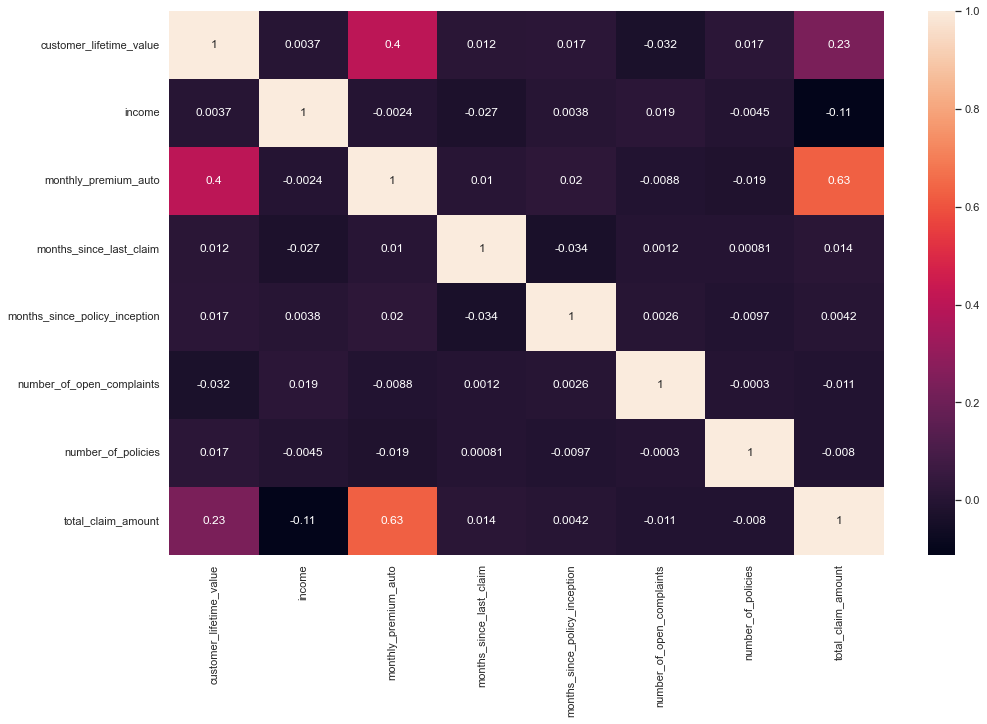

In [92]:
fig=plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(),annot=True)

In [93]:
numeric_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


### our brief analysis is is clear that 'customer_lifetime_value', 'monthly_premium_auto' have the tightest correlations to our target vairiable, namely total claim amount
#this warrants further investigation of these 2 for exploratory research

In [284]:
catagorical_df = df[[
 'region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size'
]]

catagorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


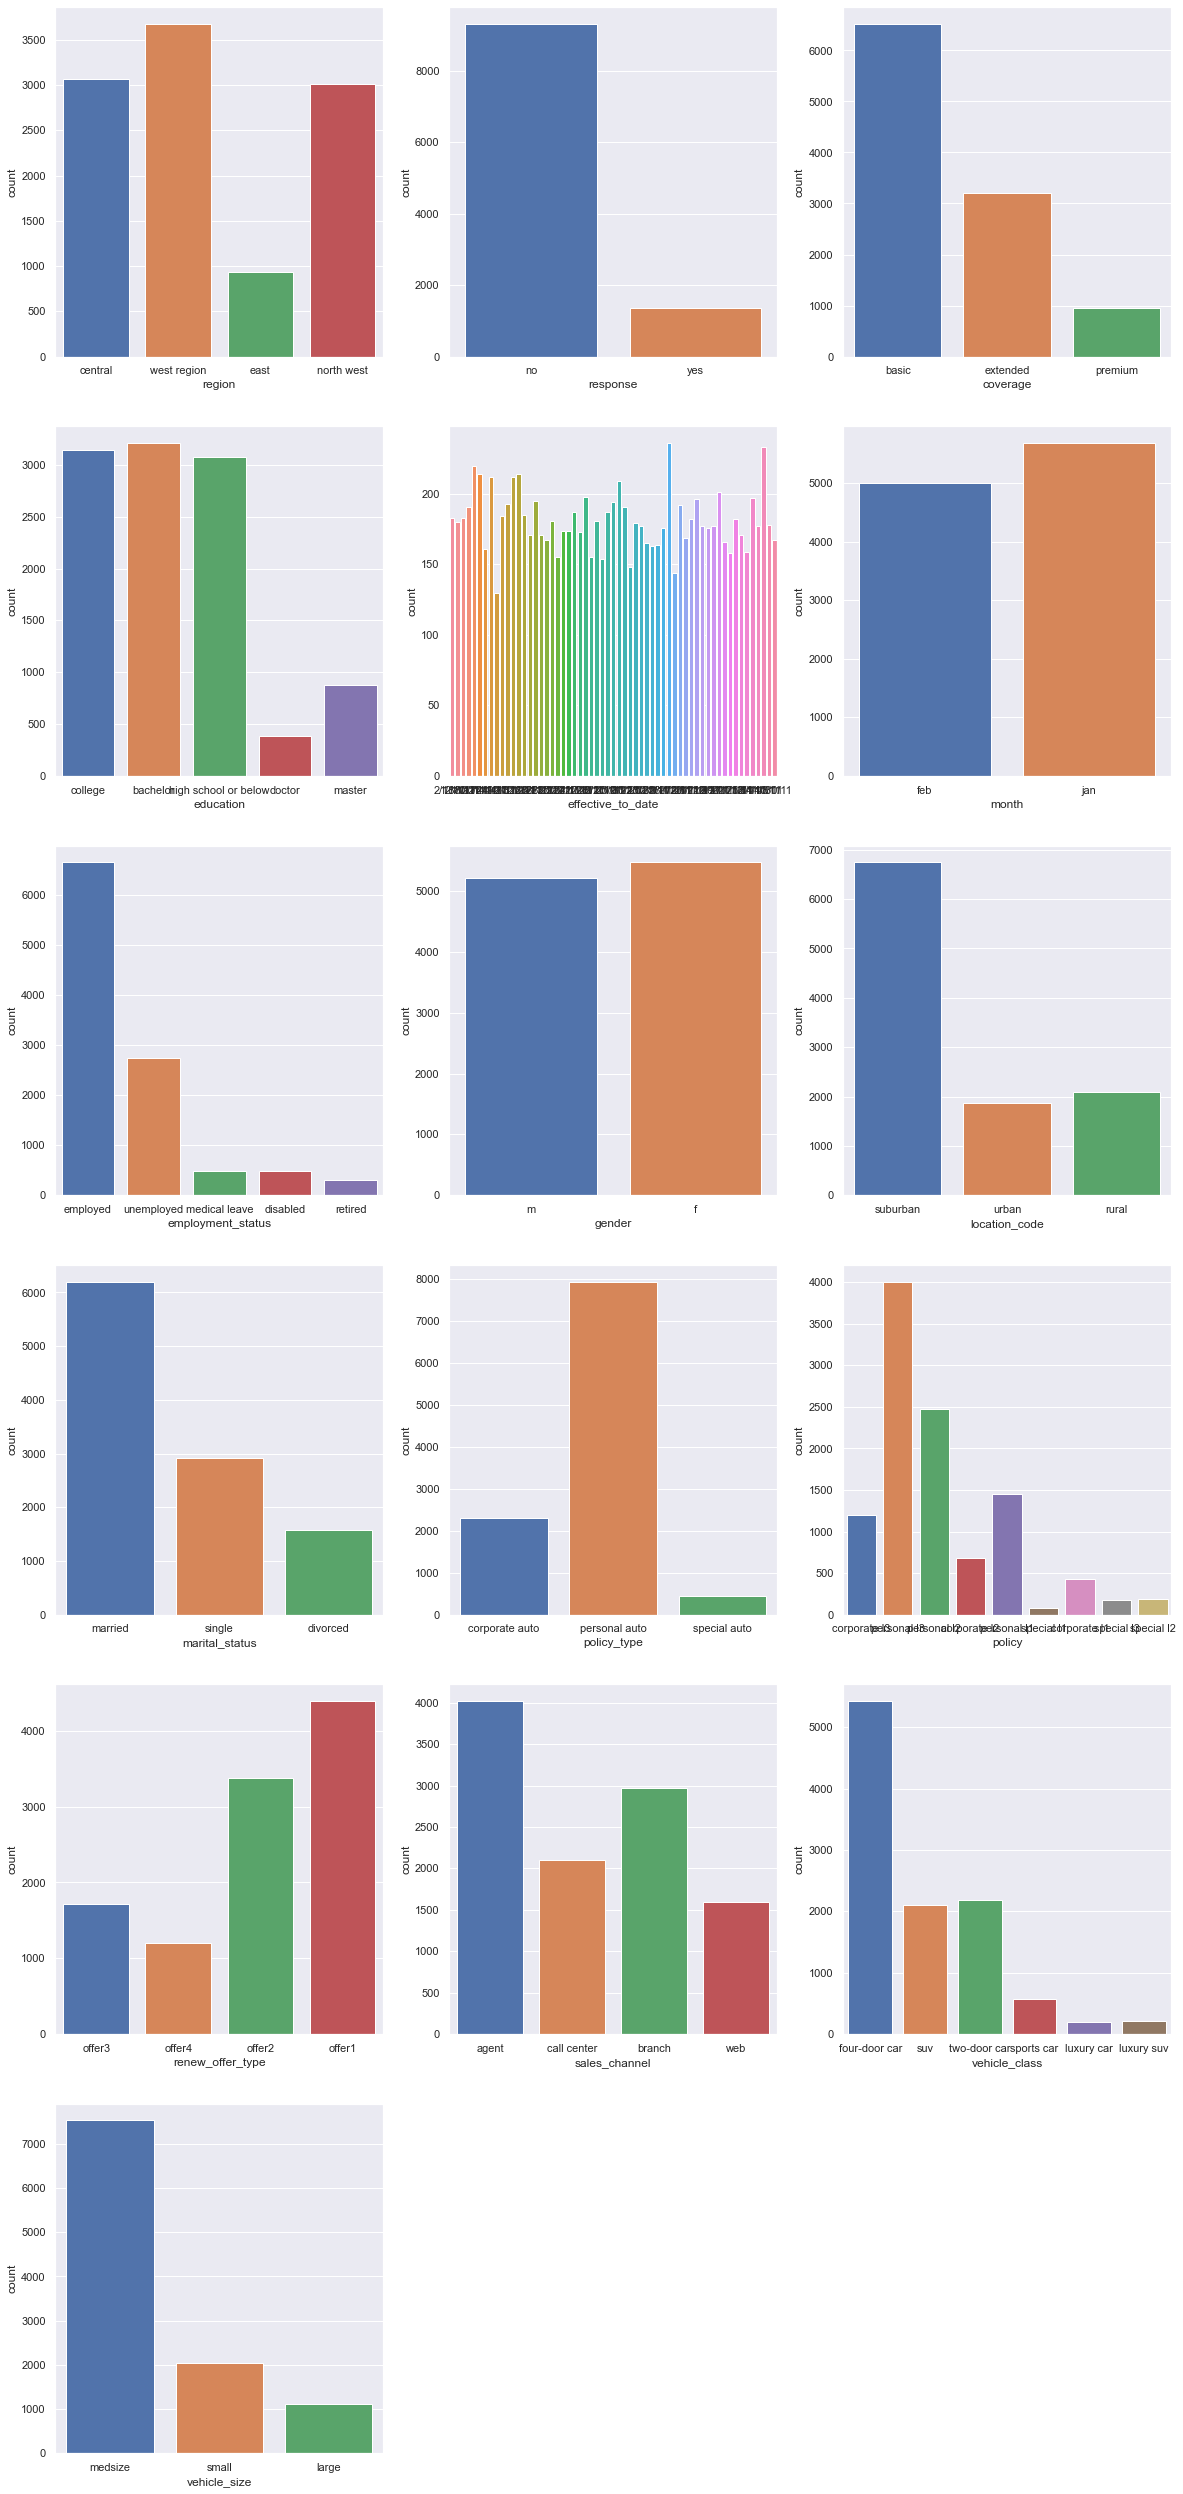

In [285]:
plt.subplots(figsize=(20, 45))
    
for i in cat_list:
    
    plt.subplot(6,3,i[0]+1)
    
    sns.countplot(i[1],data=catagorical_df,saturation=0.9)
    
    #plt.xticks(rotation=30)orange
    
fig.tight_layout(pad=20.0)


plt.show()

In [286]:
# Display modified DataFrame

invest_df = df[[
 'region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
'total_claim_amount',
'income'
]]

invest_list=list(enumerate(invest_df))

invest_df


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount,income
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize,292,48029
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize,744,92260
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize,480,22139
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,484,49078
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize,707,23675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize,1214,61541
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize,273,61146
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,381,39837
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize,618,64195


## Thursday Lab

<AxesSubplot:xlabel='count', ylabel='response'>

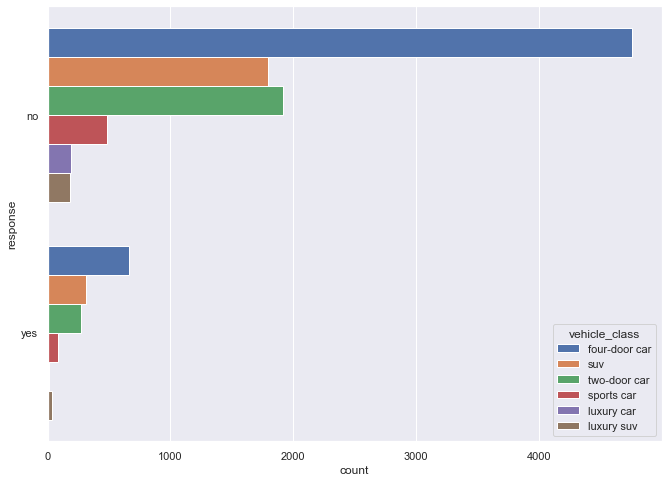

In [279]:
sns.countplot(data=invest_df,saturation=0.9,y='response',hue='vehicle_class')

<AxesSubplot:xlabel='count', ylabel='response'>

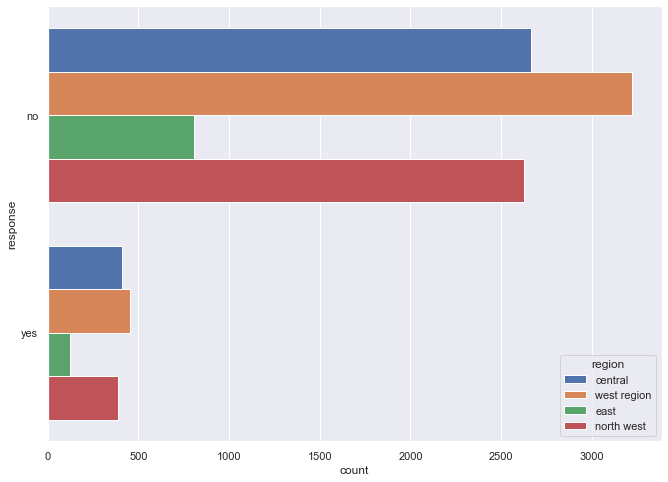

In [291]:
figsize=(17, 35)
sns.countplot(data=invest_df,saturation=0.9,y='response',hue='region')


<AxesSubplot:xlabel='response', ylabel='count'>

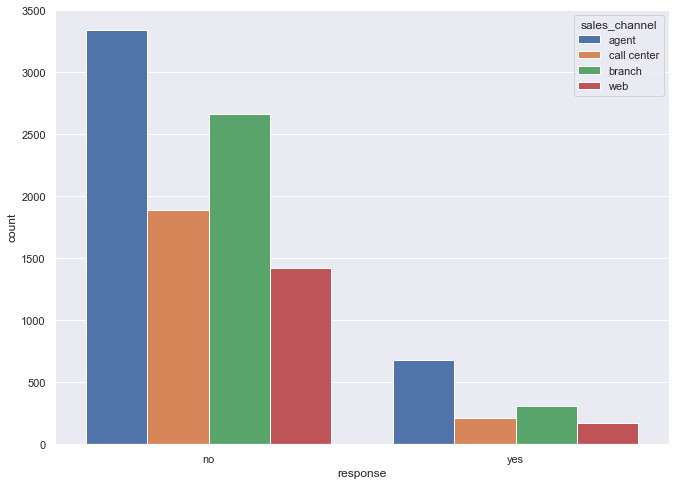

In [331]:
figsize=(12, 18)
sns.countplot(data=invest_df,saturation=0.9,x='response',hue='sales_channel')


<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

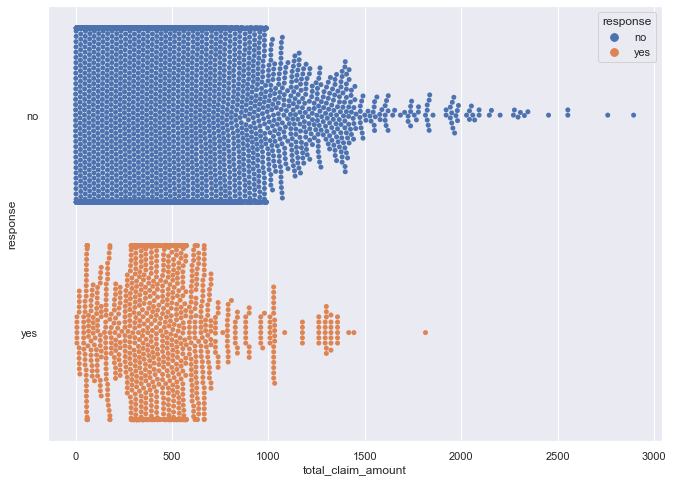

In [294]:
sns.swarmplot(data=invest_df, x="total_claim_amount", y="response",hue="response")


In [295]:
#rounding up claims to nearest 100 to allow for better plotting

invest_df['total_claims_round'] = invest_df['total_claim_amount'].apply(lambda x:np.ceil(x / 100.0)) * 100
        
invest_df


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount,income,total_claims_round
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize,292,48029,300.0
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize,744,92260,800.0
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize,480,22139,500.0
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,484,49078,500.0
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize,707,23675,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize,1214,61541,1300.0
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize,273,61146,300.0
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,381,39837,400.0
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize,618,64195,700.0


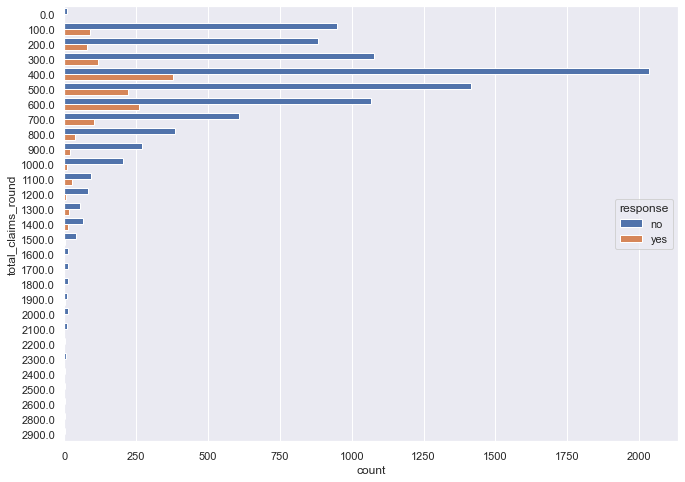

In [312]:
figsize=(20, 45)
fig, ax = plt.subplots()
gfg=sns.countplot(y='total_claims_round', hue='response',saturation=0.9, data=invest_df)



In [299]:
#rounding up claims to nearest 100 to allow for better plotting

invest_df['income_round'] = invest_df['income'].apply(lambda x:np.ceil(x / 5000)) * 5000
        
invest_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount,income,total_claims_round,income_round
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize,292,48029,300.0,50000.0
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize,744,92260,800.0,95000.0
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize,480,22139,500.0,25000.0
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,484,49078,500.0,50000.0
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize,707,23675,800.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize,1214,61541,1300.0,65000.0
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize,273,61146,300.0,65000.0
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,381,39837,400.0,40000.0
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize,618,64195,700.0,65000.0


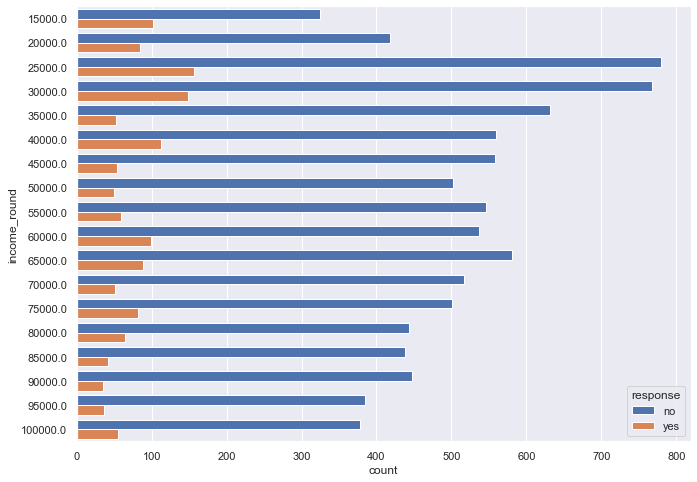

In [309]:

gfg=sns.countplot(y='income_round', hue='response',saturation=0.95, data=invest_df)

#plt.xticks(rotation=30)


ValueError: num must be 1 <= num <= 18, not 19

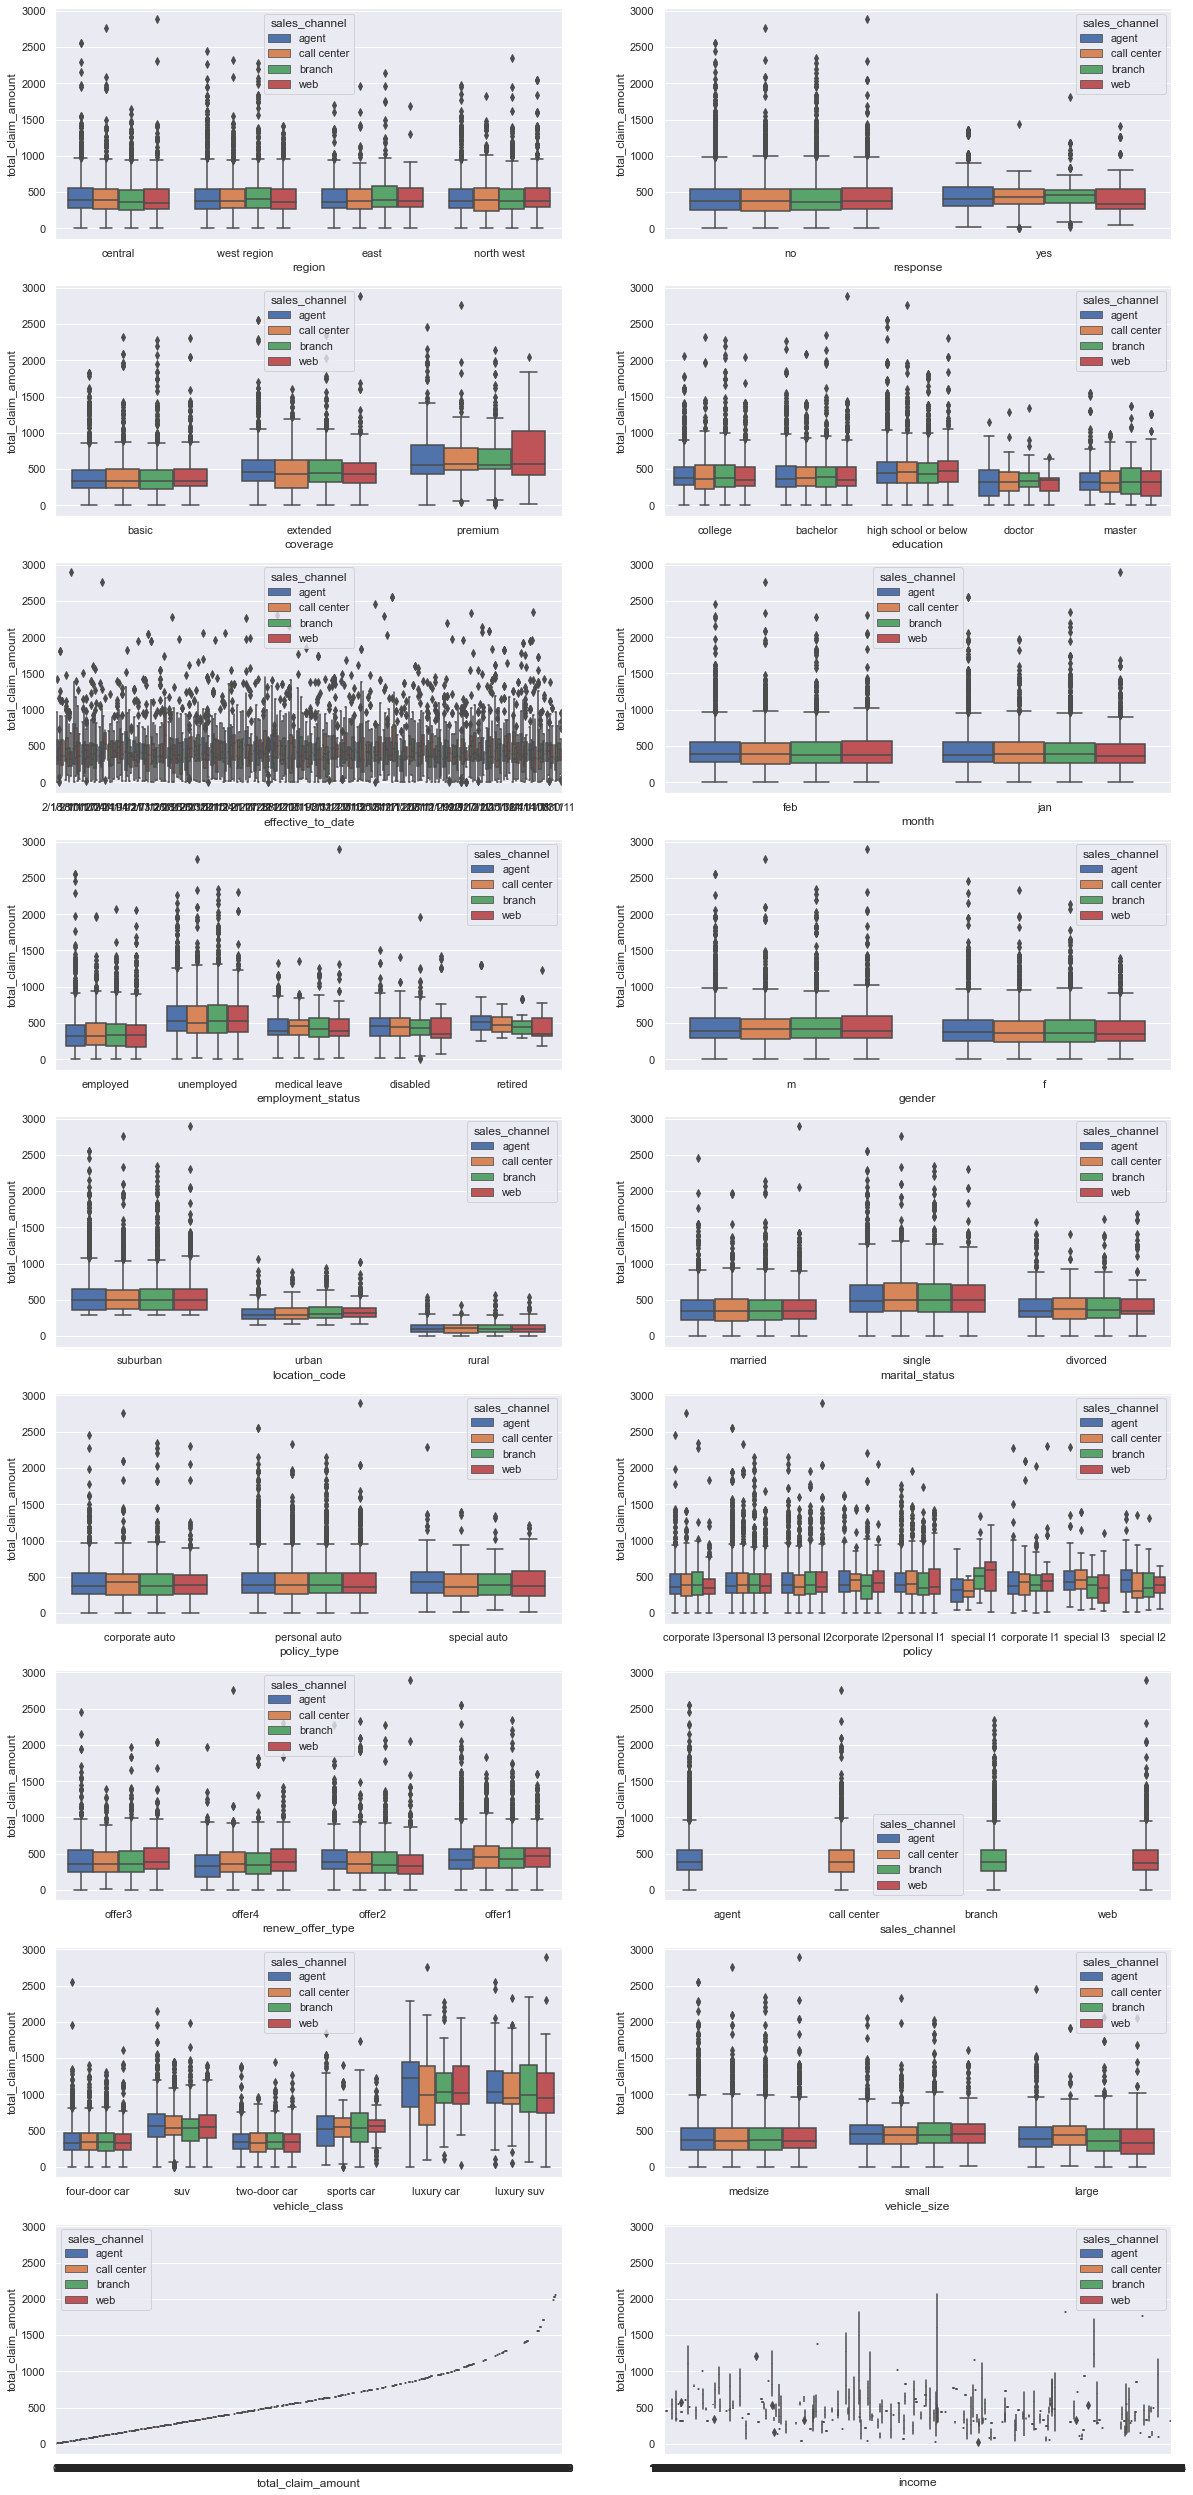

In [324]:
#Sales differences

plt.subplots(figsize=(20, 45))
    
for i in invest_list:
    
    plt.subplot(9,2,i[0]+1)
   
    sns.boxplot(i[1],data=invest_df,saturation=0.9,y='total_claim_amount',hue='sales_channel')
    
    #plt.xticks(rotation=30)orange
    
fig.tight_layout(pad=20.0)


plt.show()


ValueError: num must be 1 <= num <= 18, not 19

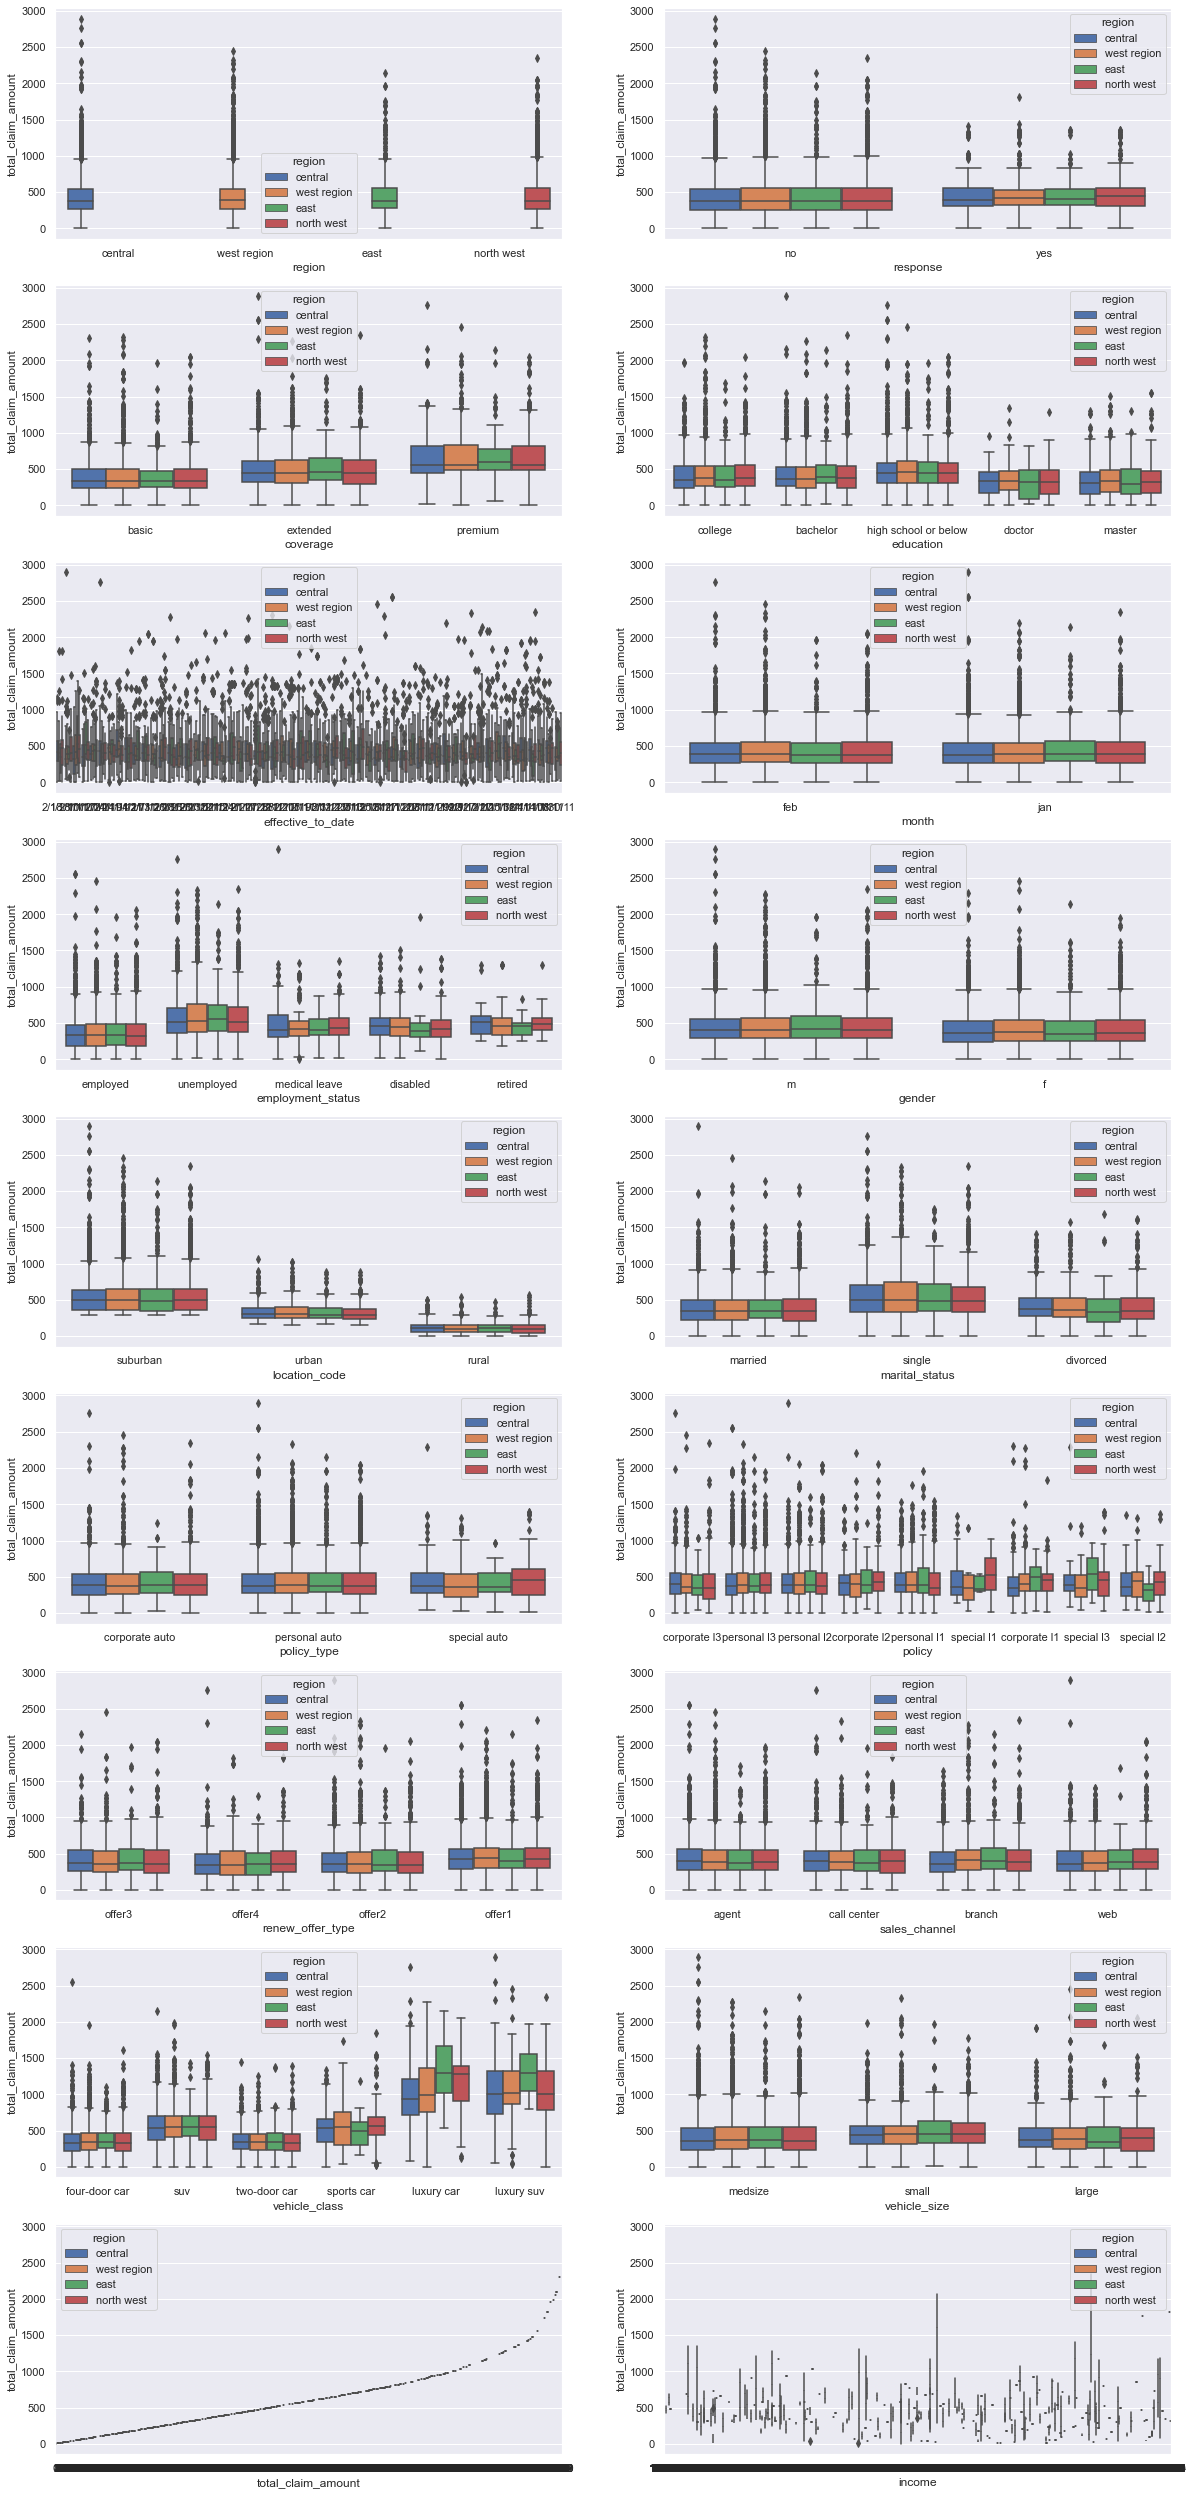

In [316]:
#Regional differences

plt.subplots(figsize=(20, 45))
    
for i in invest_list:
    
    plt.subplot(9,2,i[0]+1)
   
    sns.boxplot(i[1],data=invest_df,saturation=0.9,y='total_claim_amount',hue='region')
    
    #plt.xticks(rotation=30)orange
    
fig.tight_layout(pad=20.0)


plt.show()

single,unemployed,males in luxury cars on east coast numerically have highest claims

they therefore warrant the highest insurance rate to balance cost/benefit(makes sense :)

another finding is that our customer lifetime value is very low-correlated with premium plan rate

as married suburban mid income women have lowest risk and seem to be under represented we should target our focus on that class

many insurance companies do this by default anyway

also as surverys etc cost us money and people with large claims are the least responsive(makes sense-blocking emails, scared of debt collections etc)

focus on newer customers and to retain them